Problem Statement: 

Prepare a classification model using Naive Bayes 
for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual


In [78]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB
from sklearn.naive_bayes import BernoulliNB as BN
from sklearn.preprocessing import LabelEncoder

In [57]:
# Importing the training dataset
salary_train = pd.read_csv("G:/data sceince/Assignments/Naive Bayes/SalaryData_Train.csv")

In [58]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [59]:
salary_train.shape

(30161, 14)

In [60]:
# Importing the test dataset
salary_test = pd.read_csv("G:/data sceince/Assignments/Naive Bayes/SalaryData_Test.csv")

In [61]:
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [62]:
salary_test.shape

(15060, 14)

In [63]:
#checking for overall info. of training dataset like null values and data types
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [64]:
#checking for overall info. of test dataset like null values and data types
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [65]:
#Converting the Y variable into labels

label_encoder = LabelEncoder()
salary_test['Salary'] = label_encoder.fit_transform(salary_test.Salary)
salary_train['Salary'] = label_encoder.fit_transform(salary_train.Salary)

<AxesSubplot:xlabel='Salary', ylabel='count'>

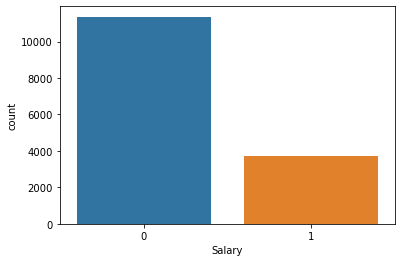

In [66]:
# Checking whether the class(y)variable is balanced or not.
import seaborn as sns

sns.countplot(x = 'Salary', data = salary_test )

Salary : <=50K is under oth class and Salary : >50K is under 1 class

In [67]:
# converting the categorical columns into dummy variables 

salary_train = pd.get_dummies(salary_train)
salary_test = pd.get_dummies(salary_test)

In [68]:
salary_train.dtypes

age                        int64
educationno                int64
capitalgain                int64
capitalloss                int64
hoursperweek               int64
                           ...  
native_ Thailand           uint8
native_ Trinadad&Tobago    uint8
native_ United-States      uint8
native_ Vietnam            uint8
native_ Yugoslavia         uint8
Length: 103, dtype: object

In [69]:
# assigning the training data to x_train and y_train and test data to x_test and y_test

x_train_std = salary_train.drop('Salary', axis = 1)
y_train = salary_train['Salary']
x_test_std = salary_test.drop('Salary', axis = 1)
y_test = salary_test['Salary']

### Building the model

#### Multinomial Naive Bayes

In [112]:
classifier_MB = MB()
classifier_MB.fit(x_train_std,y_train)
train_predict1 = classifier_MB.predict(x_train_std)
accuracy_train = np.mean(train_predict1==y_train)

In [113]:
accuracy_train*100

77.29186698053778

In [114]:
test_predict1 = classifier_MB.predict(x_test)
accuracy_test = np.mean(test_predict1==y_test)

In [115]:
accuracy_test*100

77.49667994687915

In [116]:
print(classification_report(test_predict1, y_test))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87     13811
           1       0.21      0.62      0.32      1249

    accuracy                           0.77     15060
   macro avg       0.58      0.71      0.59     15060
weighted avg       0.90      0.77      0.82     15060



#### Gaussian Naive Bayes

In [117]:
classifier_GB = GB()
classifier_GB.fit(x_train,y_train)
train_predict2 = classifier_GB.predict(x_train)
accuracy_train = np.mean(train_predict2==y_train)

In [118]:
# Training Accuracy 
accuracy_train*100

80.3156394018766

In [119]:
test_predict2 = classifier_GB.predict(x_test)
accuracy_test = np.mean(test_predict2==y_test)

In [120]:
# Test accuracy
accuracy_test*100

80.29216467463479

In [110]:
from sklearn.metrics import classification_report

In [111]:
print(classification_report(test_predict2, y_test))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      9754
           1       0.82      0.57      0.67      5306

    accuracy                           0.80     15060
   macro avg       0.81      0.75      0.76     15060
weighted avg       0.80      0.80      0.79     15060



#### Bernolli Naive Bayes

In [121]:
classifier_BN = BN(binarize = True)
classifier_BN.fit(x_train,y_train)
train_predict3 = classifier_BN.predict(x_train)
accuarcy_train = np.mean(train_predict3 == y_train)

In [122]:
# Training accuracy
accuracy_train*100

80.3156394018766

In [123]:
test_predict3 = classifier_BN.predict(x_test)
accuracy_test = np.mean(test_predict3==y_test)

In [124]:
# Test accuarcy
accuracy_test*100

77.47675962815404

In [125]:
print(classification_report(test_predict3, y_test))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87     13810
           1       0.21      0.62      0.31      1250

    accuracy                           0.77     15060
   macro avg       0.58      0.71      0.59     15060
weighted avg       0.90      0.77      0.82     15060



Inference : As we are classifying the numeric data so using gaussian is always better and from the accuracy also we can see that we are getting good accuracy in gaussian naive bayes